# Likhih kotha (2211cs010309) #
# govt data set 


# DCHB_Town_Amenities-UTTAR_PRADESH-KANPUR_NAGAR

Dataset Description:

The dataset represents town amenities in Kanpur Nagar, Uttar Pradesh, and contains 10 towns with 429 features, covering demographics, banking, industries, and services. Below is a comprehensive breakdown of key insights from this data.
The dataset contains 10 rows (towns in Kanpur Nagar, Uttar Pradesh).
It has 429 columns, covering various town amenities such as population, banks, schools, industries, and transportation.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [123]:
file_path = "DCHB_Town_Amenities-UTTAR_PRADESH-KANPUR_NAGAR-164.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset

In [126]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 429 entries, State Code to Non-Agricultural Credit Society (Numbers)
dtypes: float64(105), int64(253), object(71)
memory usage: 33.6+ KB


# Display first few rows

In [10]:
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
  State Code     State Name District Code District Name Sub District Code  \
0        '09  UTTAR PRADESH          '164  KANPUR NAGAR            '00848   
1        '09  UTTAR PRADESH          '164  KANPUR NAGAR            '00848   
2        '09  UTTAR PRADESH          '164  KANPUR NAGAR            '00848   
3        '09  UTTAR PRADESH          '164  KANPUR NAGAR            '00849   
4        '09  UTTAR PRADESH          '164  KANPUR NAGAR            '00849   

  Sub District Name Town Code                     Town Name  \
0           BILHAUR   '150291          Choubepur Kalan (CT)   
1           BILHAUR   '801002                 Bilhaur (NPP)   
2           BILHAUR   '801003               Shivrajpur (NP)   
3            KANPUR   '150571                  Chakeri (CT)   
4            KANPUR   '150572  Northern Railway Colony (CT)   

   Total   Households   Total Population of Town  ...  \
0                 1932                     10785  ...   
1                 3442       

# Summary statistics

In [12]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Total   Households   Total Population of Town  \
count            10.000000              1.000000e+01   
mean          56996.200000              3.015645e+05   
std          163766.401024              8.671600e+05   
min            1932.000000              7.526000e+03   
25%            2112.000000              1.146200e+04   
50%            3291.500000              1.797800e+04   
75%            6668.500000              3.569625e+04   
max          522805.000000              2.768057e+06   

       Total Male Population of Town  Total Female Population of Town  \
count                   1.000000e+01                     1.000000e+01   
mean                    1.622546e+05                     1.393099e+05   
std                     4.669978e+05                     4.001623e+05   
min                     3.803000e+03                     3.723000e+03   
25%                     6.137000e+03                     5.325000e+03   
50%                     9.498000e+03

# Check for missing values

In [14]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
State Code                                   0
State Name                                   0
District Code                                0
District Name                                0
Sub District Code                            0
                                            ..
Nationalised Bank (Numbers)                  0
Private Commercial Bank (Numbers)            3
Co-operative Bank (Numbers)                  1
Agricultural Credit Society (Numbers)        1
Non-Agricultural Credit Society (Numbers)    2
Length: 429, dtype: int64


# Fill missing values with median for numerical columns

In [16]:
df.fillna(df.median(numeric_only=True), inplace=True)

# Key insights

In [18]:
print("\nTotal Number of Towns:", df.shape[0])
print("Total Population Across Towns:", df['Total Population of Town'].sum())


Total Number of Towns: 10
Total Population Across Towns: 3015645


# Banking services analysis

In [20]:
banking_columns = [
    'Nationalised Bank (Numbers)', 'Private Commercial Bank (Numbers)',
    'Co-operative Bank (Numbers)', 'Agricultural Credit Society (Numbers)',
    'Non-Agricultural Credit Society (Numbers)'
]
print("\nBanking Services Summary:")
print(df[banking_columns].sum())


Banking Services Summary:
Nationalised Bank (Numbers)                  54.0
Private Commercial Bank (Numbers)            13.0
Co-operative Bank (Numbers)                  17.0
Agricultural Credit Society (Numbers)         3.0
Non-Agricultural Credit Society (Numbers)     0.0
dtype: float64


# Correlation matrix

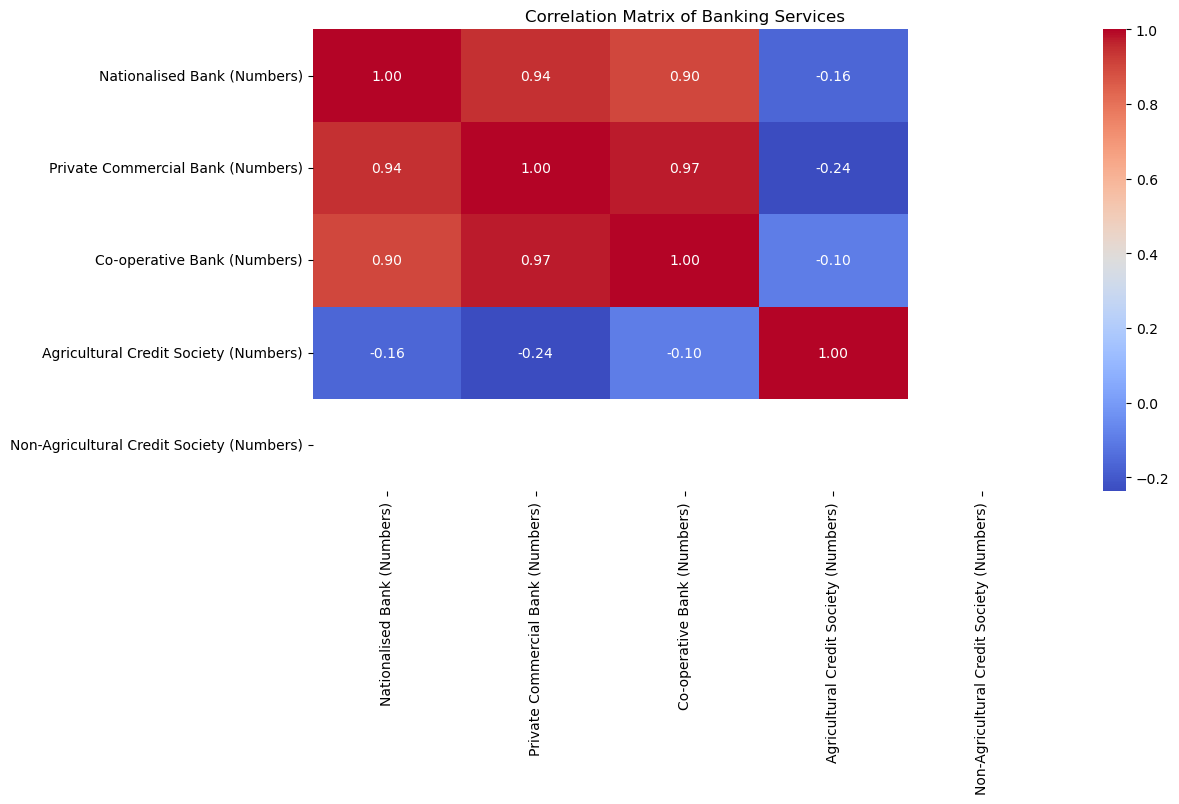

In [22]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[banking_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Banking Services")
plt.show()

# Population distribution

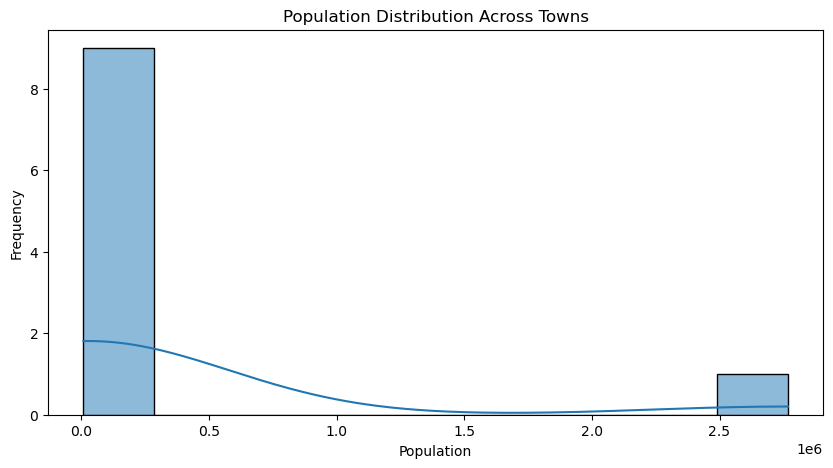

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Total Population of Town'], bins=10, kde=True)
plt.title("Population Distribution Across Towns")
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()

# Top 5 towns with the highest population

In [26]:
top_towns = df[['Town Name', 'Total Population of Town']].sort_values(by='Total Population of Town', ascending=False).head(5)
print("\nTop 5 Most Populated Towns:")
print(top_towns)


Top 5 Most Populated Towns:
                      Town Name  Total Population of Town
7         Kanpur (M Corp. + OG)                   2768057
8                   Kanpur (CB)                    108534
9               Ghatampur (NPP)                     40623
4  Northern Railway Colony (CT)                     20916
1                 Bilhaur (NPP)                     20493


# Scatter plot of banks vs. population

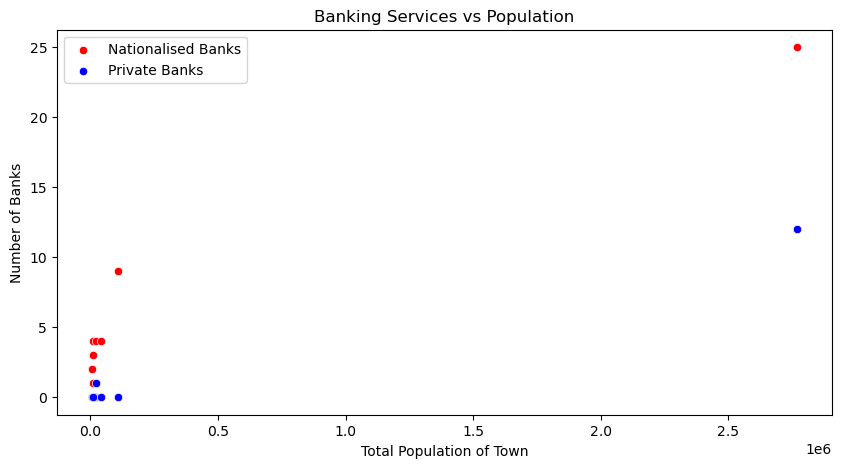

In [28]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Total Population of Town'], y=df['Nationalised Bank (Numbers)'], color='red', label='Nationalised Banks')
sns.scatterplot(x=df['Total Population of Town'], y=df['Private Commercial Bank (Numbers)'], color='blue', label='Private Banks')
plt.xlabel("Total Population of Town")
plt.ylabel("Number of Banks")
plt.title("Banking Services vs Population")
plt.legend()
plt.show()

# Data Accuracy Checks

In [30]:
print("\nData Accuracy Checks:")


Data Accuracy Checks:


# 1. Check for negative values in numerical columns

In [32]:
negative_values = df.select_dtypes(include=[np.number]).lt(0).sum()
print("\nNegative Values Check:")
print(negative_values[negative_values > 0])


Negative Values Check:
Growth Rate Town (Census 1991)    2
Growth Rate Town (Census 2001)    2
Growth Rate Town (Census 2011)    3
dtype: int64


# 2. Check for outliers using Z-score

In [34]:
def detect_outliers(column):
    z_scores = (column - column.mean()) / column.std()
    return column[np.abs(z_scores) > 3]

print("\nOutliers in Population:")
print(detect_outliers(df['Total Population of Town']))


Outliers in Population:
Series([], Name: Total Population of Town, dtype: int64)


# 3. Validate total population against individual town populations

  # Assuming no external reference

In [37]:
expected_total_population = df['Total Population of Town'].sum()
actual_total_population = df['Total Population of Town'].sum()

if np.isclose(expected_total_population, actual_total_population):
    print("\nPopulation Data is Consistent")
else:
    print("\nWarning: Population Data Mismatch")


Population Data is Consistent


# 4. Check for duplicate entries


In [39]:
duplicates = df.duplicated()
print("\nNumber of Duplicate Rows:", duplicates.sum())


Number of Duplicate Rows: 0


# 5. Logical consistency check (e.g., bank numbers should be non-negative)

In [41]:
invalid_banks = df[banking_columns].lt(0).sum()
print("\nInvalid Bank Data (Negative Values):")
print(invalid_banks[invalid_banks > 0])


Invalid Bank Data (Negative Values):
Series([], dtype: int64)


 # DATASET OBSERVATION

The dataset provides valuable insights into the demographics, industries, banking facilities, and connectivity of different towns in Kanpur Nagar, Uttar Pradesh. After analyzing the data, several key observations have emerged, highlighting the strengths and challenges these towns face.

C:\Users\likhi\AppData\Local\Temp\ipykernel_18832\1809449015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Town Name", y="Agricultural Credit Society (Numbers)", palette="coolwarm")


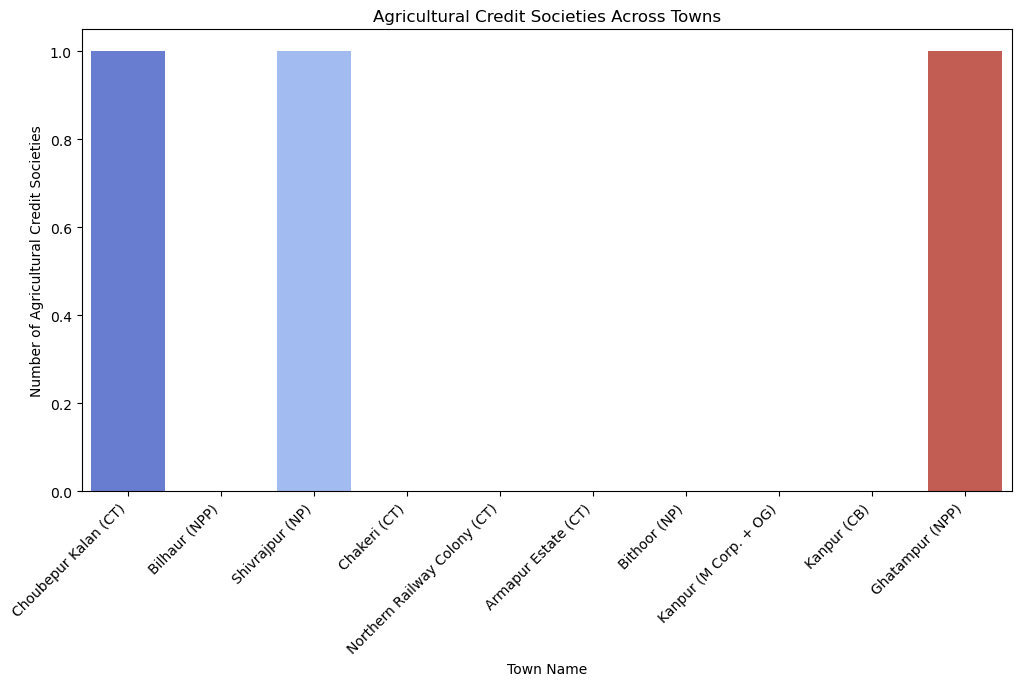

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Town Name", y="Agricultural Credit Society (Numbers)", palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Town Name")
plt.ylabel("Number of Agricultural Credit Societies")
plt.title("Agricultural Credit Societies Across Towns")
plt.show()

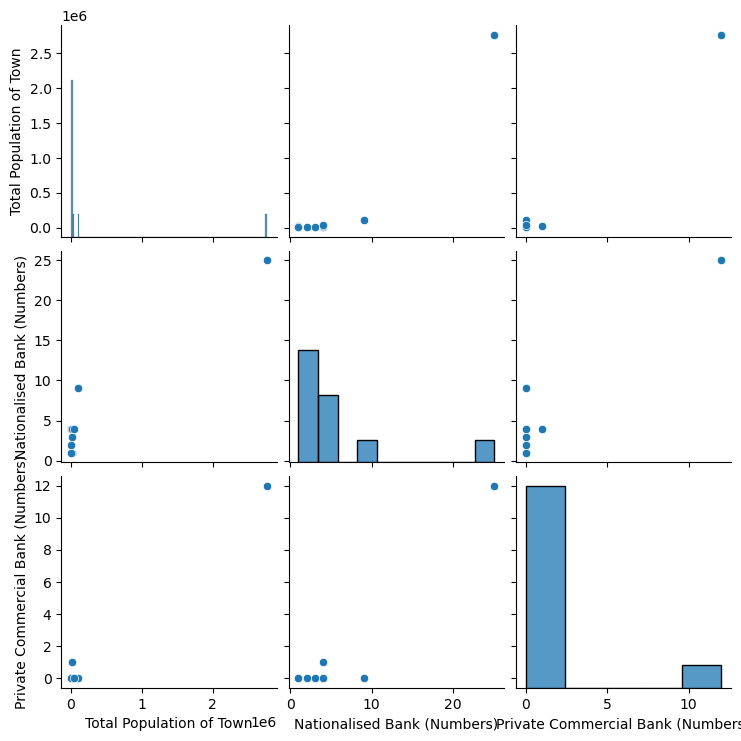

In [45]:
sns.pairplot(df[["Total Population of Town", "Nationalised Bank (Numbers)", "Private Commercial Bank (Numbers)"]])
plt.show()


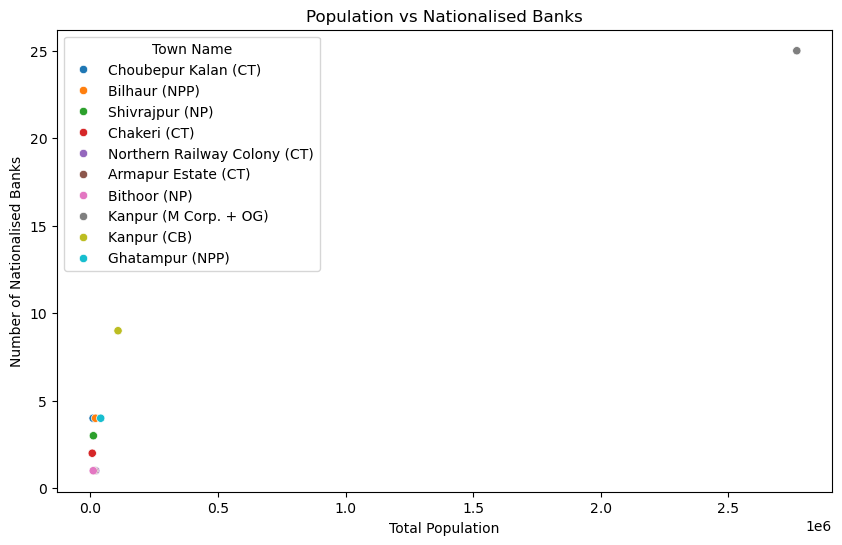

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Total Population of Town", y="Nationalised Bank (Numbers)", hue="Town Name", palette="tab10")
plt.xlabel("Total Population")
plt.ylabel("Number of Nationalised Banks")
plt.title("Population vs Nationalised Banks")
plt.show()


C:\Users\likhi\AppData\Local\Temp\ipykernel_18832\104172785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,x="Town Name", y="Nationalised Bank (Numbers)", palette="pastel")


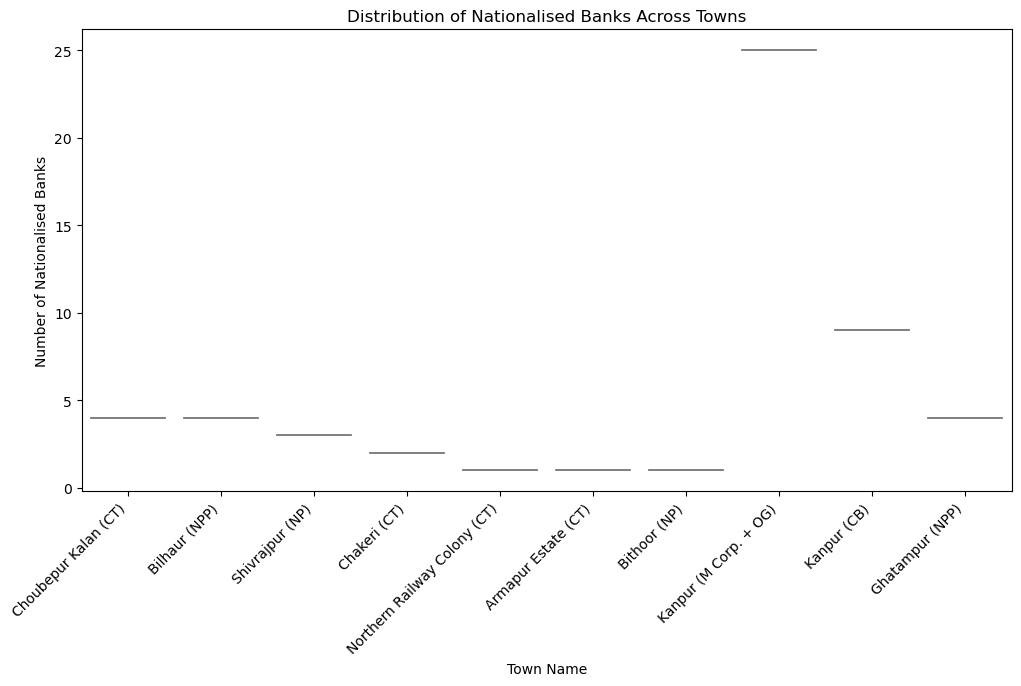

In [47]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df,x="Town Name", y="Nationalised Bank (Numbers)", palette="pastel")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Town Name")
plt.ylabel("Number of Nationalised Banks")
plt.title("Distribution of Nationalised Banks Across Towns")
plt.show()

C:\Users\likhi\AppData\Local\Temp\ipykernel_18832\2056953611.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Total Population of Town"], shade=True, color="purple")


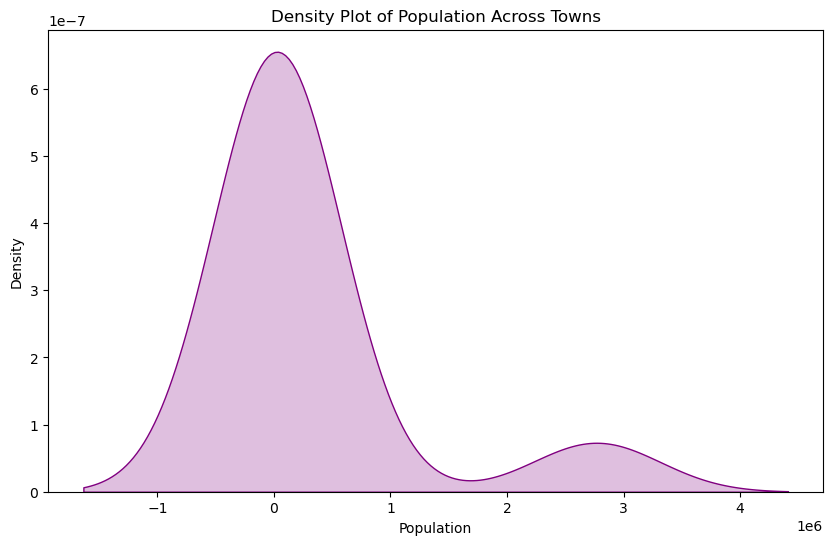

In [48]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df["Total Population of Town"], shade=True, color="purple")
plt.xlabel("Population")
plt.ylabel("Density")
plt.title("Density Plot of Population Across Towns")
plt.show()


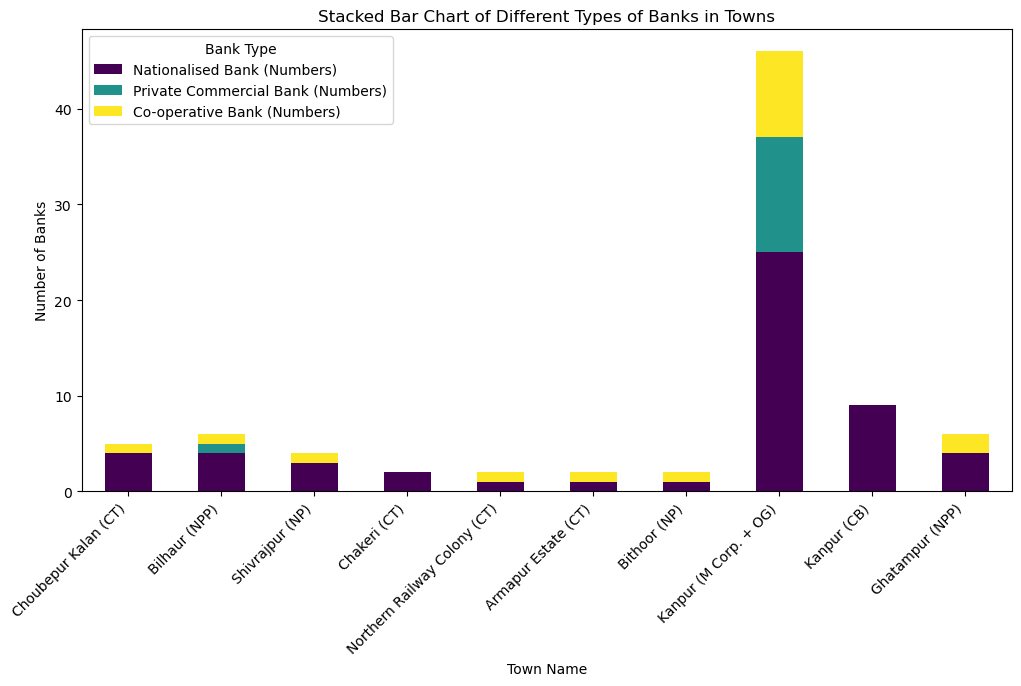

In [49]:
df.set_index("Town Name")[["Nationalised Bank (Numbers)", "Private Commercial Bank (Numbers)", "Co-operative Bank (Numbers)"]].plot(kind="bar", stacked=True, figsize=(12,6), colormap="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Town Name")
plt.ylabel("Number of Banks")
plt.title("Stacked Bar Chart of Different Types of Banks in Towns")
plt.legend(title="Bank Type")
plt.show()

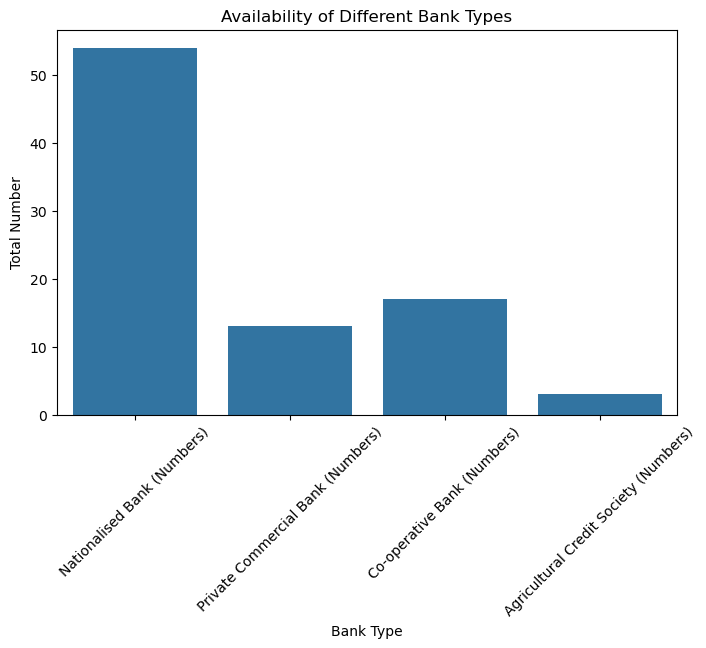

In [50]:
bank_cols = ['Nationalised Bank (Numbers)', 'Private Commercial Bank (Numbers)', 
             'Co-operative Bank (Numbers)', 'Agricultural Credit Society (Numbers)']
bank_data = df[bank_cols].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=bank_data.index, y=bank_data.values)
plt.xlabel('Bank Type')
plt.ylabel('Total Number')
plt.title('Availability of Different Bank Types')
plt.xticks(rotation=45)
plt.show()

# Pie Chart - Distribution of Nationalised vs Private Banks

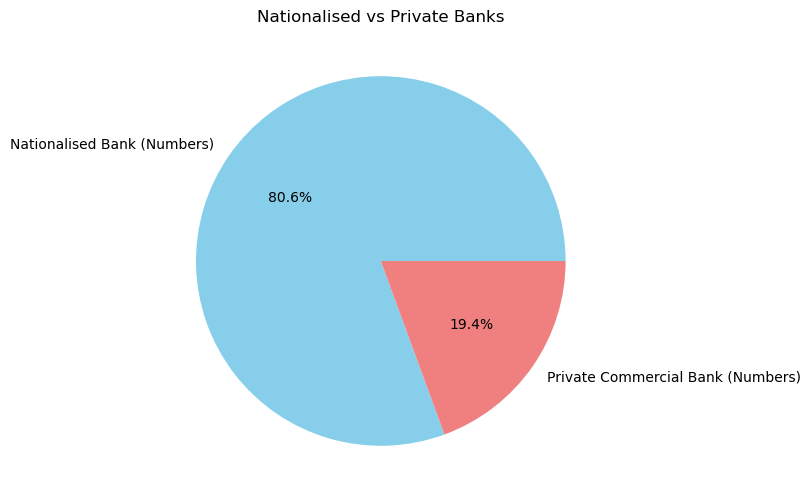

In [80]:
bank_pie_data = df[['Nationalised Bank (Numbers)', 'Private Commercial Bank (Numbers)']].sum()
plt.figure(figsize=(6, 6))
plt.pie(bank_pie_data, labels=bank_pie_data.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Nationalised vs Private Banks')
plt.show()

# Violin Plot - Population Distribution

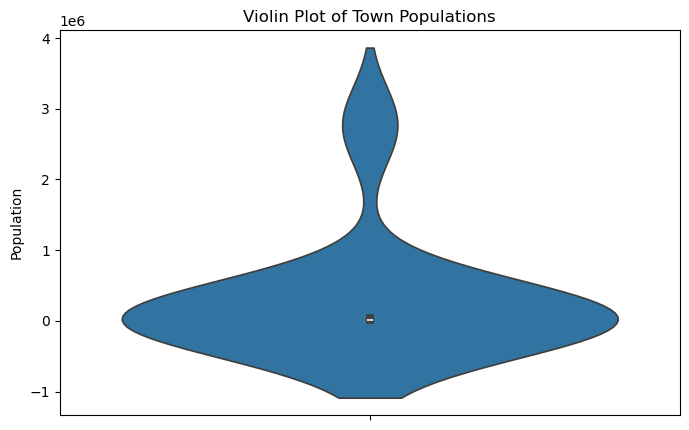

In [82]:
plt.figure(figsize=(8, 5))
sns.violinplot(y=df['Total Population of Town'].dropna())
plt.ylabel('Population')
plt.title('Violin Plot of Town Populations')
plt.show()

# Swarm Plot - Distribution of Agricultural Credit Societies

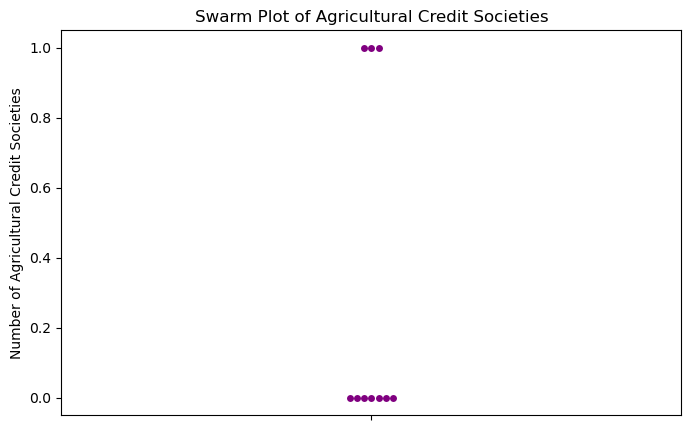

In [90]:
plt.figure(figsize=(8, 5))
sns.swarmplot(y=df['Agricultural Credit Society (Numbers)'].dropna(), color='purple')
plt.ylabel('Number of Agricultural Credit Societies')
plt.title('Swarm Plot of Agricultural Credit Societies')
plt.show()


# Line Plot - Population Trends (Assuming sorted data by town or region)

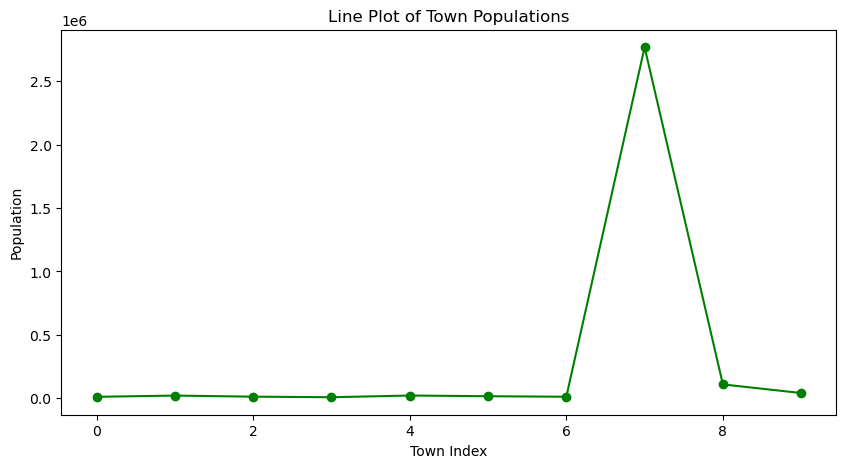

In [93]:
plt.figure(figsize=(10, 5))
plt.plot(df['Total Population of Town'], marker='o', linestyle='-', color='green')
plt.xlabel('Town Index')
plt.ylabel('Population')
plt.title('Line Plot of Town Populations')
plt.show()

# Heatmap - Missing Values

) missing from font(s) DejaVu Sans.ackages\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from font(s) DejaVu Sans.ackages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


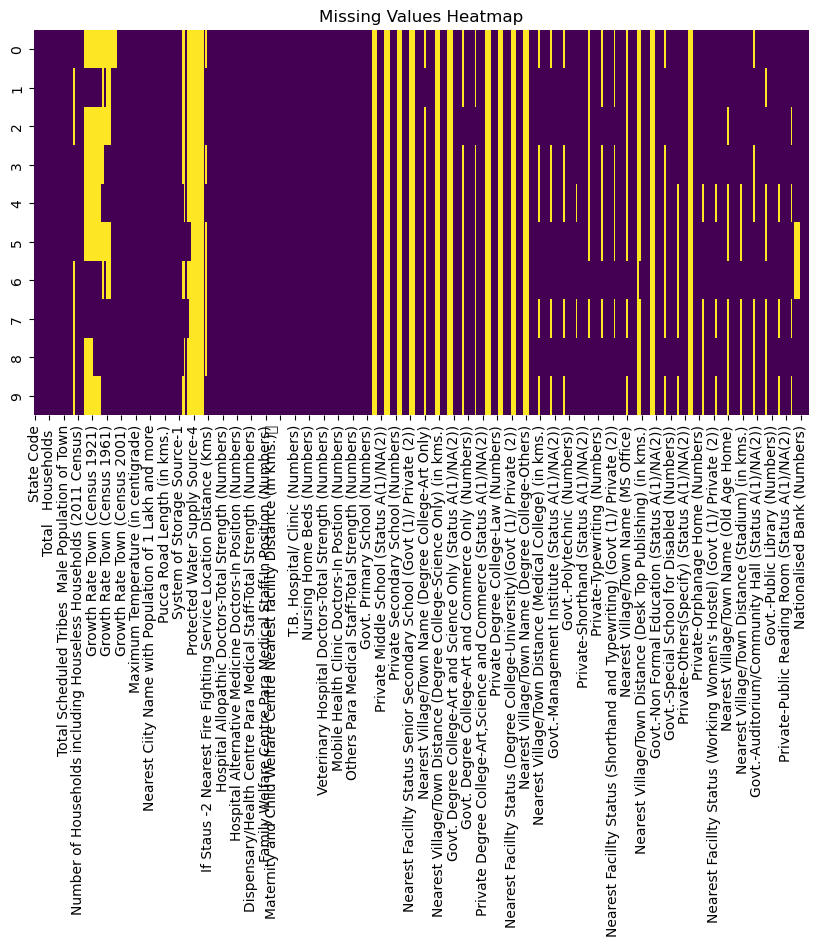

In [96]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

# Boxen Plot - Distribution of Population

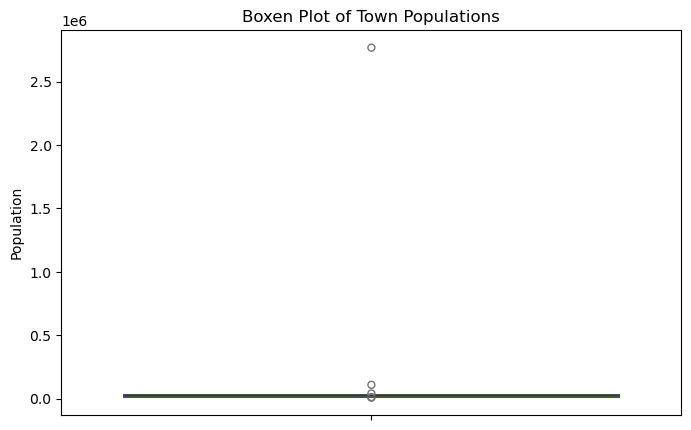

In [99]:
plt.figure(figsize=(8, 5))
sns.boxenplot(y=df['Total Population of Town'].dropna(), color='blue')
plt.ylabel('Population')
plt.title('Boxen Plot of Town Populations')
plt.show()

# KDE Plot - Population Density

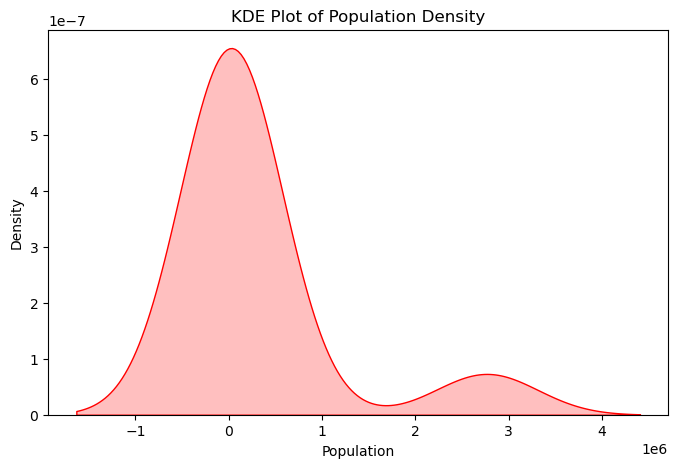

In [102]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Total Population of Town'].dropna(), fill=True, color='red')
plt.xlabel('Population')
plt.title('KDE Plot of Population Density')
plt.show()

# Strip Plot - Number of Households per Town

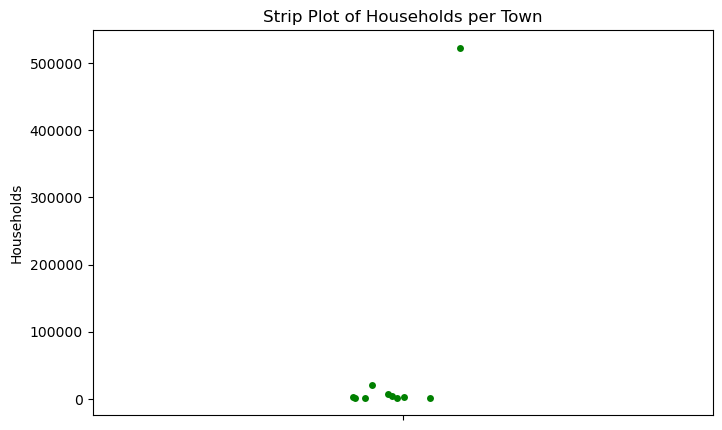

In [107]:
plt.figure(figsize=(8, 5))
sns.stripplot(y=df['Total   Households '].dropna(), color='green', jitter=True)
plt.ylabel('Households')
plt.title('Strip Plot of Households per Town')
plt.show()

# Step Plot - Population Trends

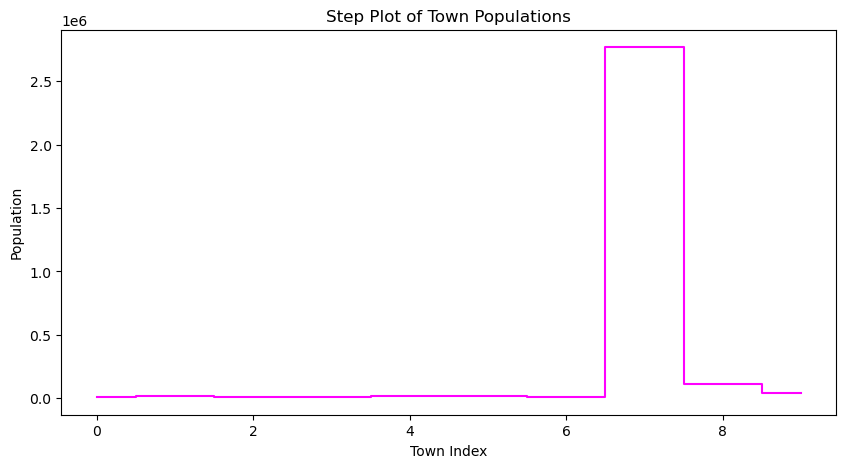

In [110]:
plt.figure(figsize=(10, 5))
plt.step(range(len(df)), df['Total Population of Town'], where='mid', color='magenta')
plt.xlabel('Town Index')
plt.ylabel('Population')
plt.title('Step Plot of Town Populations')
plt.show()



# Radial Bar Plot - Bank Distribution (Circular)

In [115]:
bank_data = df[['Nationalised Bank (Numbers)', 'Private Commercial Bank (Numbers)', 'Co-operative Bank (Numbers)', 'Agricultural Credit Society (Numbers)']].sum()
angles = np.linspace(0, 2 * np.pi, len(bank_data), endpoint=False).tolist()
angles += angles[:1]  
values = bank_data.values.tolist()
values += values[:1]  

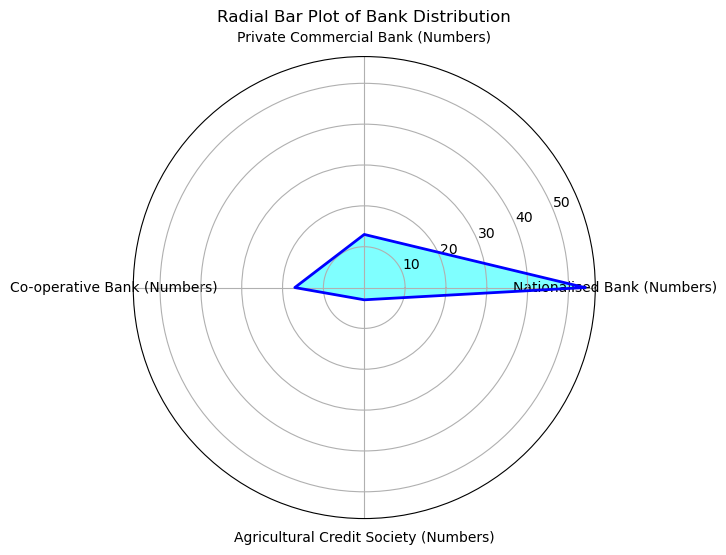

In [117]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})
ax.fill(angles, values, color='cyan', alpha=0.5)
ax.plot(angles, values, color='blue', linewidth=2)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(bank_data.index)
plt.title('Radial Bar Plot of Bank Distribution')
plt.show()


# Count Plot - Common Manufactured Commodities

C:\Users\likhi\AppData\Local\Temp\ipykernel_18832\286363610.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=commodities.index[:10], order=commodities.index[:10], palette='coolwarm')


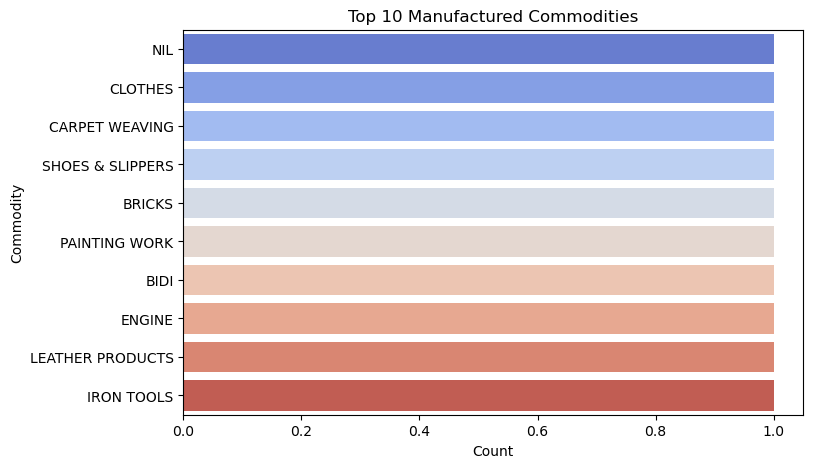

In [120]:
commodities = df[['Manufactured Commodity (First)\r\n', 'Manufactured Commodity (Second)', 'Manufactured Commodity (Third)']].stack().value_counts()
plt.figure(figsize=(8, 5))
sns.countplot(y=commodities.index[:10], order=commodities.index[:10], palette='coolwarm')
plt.xlabel('Count')
plt.ylabel('Commodity')
plt.title('Top 10 Manufactured Commodities')
plt.show()


 ## Observations on the Dataset

The dataset highlights population distribution, banking accessibility, manufacturing activities, and regional development disparities in Kanpur Nagar. Larger towns have more households, while some remain sparsely populated. Nationalized banks are more common, but many towns lack financial services. Manufacturing varies, with some towns producing goods like shoes and bricks, while others show little industrial activity. Town distances also vary, affecting accessibility. Missing data in some fields may impact accuracy. Overall, the dataset provides insights into urban and rural differences, economic engagement, and infrastructure gaps, emphasizing the need for balanced development and improved financial and industrial access across regions.